In [26]:
import pandas as pd 

from sklearn.preprocessing import StandardScaler 
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier #Random Forest 

from sklearn.preprocessing import OneHotEncoder 

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller  

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [27]:
readings_df = pd.read_csv('preprocessed.csv')
readings_df['date'] = pd.to_datetime(readings_df['date'])
# readings_df.info()

In [28]:
readings_df.info()
filtered_df = readings_df[(readings_df['value_type_id'] == 11) & (readings_df['device_id'] == 1)]

start_date = '2023-8-01'
end_date = '2023-8-31'

filtered_df = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Unnamed: 0     1048575 non-null  int64         
 1   device_id      1048575 non-null  int64         
 2   date           1048575 non-null  datetime64[ns]
 3   value_type_id  1048575 non-null  int64         
 4   value          1048575 non-null  float64       
 5   work_hours     1048575 non-null  bool          
 6   season         1048575 non-null  object        
 7   day type       1048575 non-null  int64         
 8   building_id    1048575 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 65.0+ MB


In [29]:
# Augmented Dickey-Fuller test
# determines if a series is stationary
test_series_data = filtered_df[['value']]

test_series_data.index = pd.to_datetime(filtered_df['date'])

# test_series_data.info()

results = adfuller(test_series_data)

print('Test Statistic:', results[0])
print('P-Value:', results[1])

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 52 to 4921
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     39 non-null     int64         
 1   device_id      39 non-null     int64         
 2   date           39 non-null     datetime64[ns]
 3   value_type_id  39 non-null     int64         
 4   value          39 non-null     float64       
 5   work_hours     39 non-null     bool          
 6   season         39 non-null     object        
 7   day type       39 non-null     int64         
 8   building_id    39 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 52 to 4921
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   39 non-null     float64
dtypes: float64(1)
memory usage: 624.0

ValueError: could not broadcast input array from shape (39,) into shape (51,)

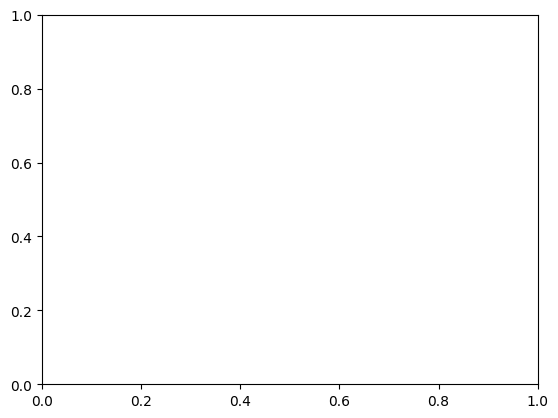

In [30]:

# ACF AND PACF to determine autoregressive term (p) and moving averages term (q)

time_series_data = filtered_df[['value']]
time_series_data.index = pd.to_datetime(filtered_df['date'])

# ACF
plot_acf(time_series_data['value'], lags = 50)
plt.show()

# PACF
plot_pacf(time_series_data['value'], lags = 50)
plt.show()

In [ ]:
# 4funning idk what this is 
time_series_data = filtered_df[['date', 'value']]

time_series_data = time_series_data.set_index('date')

train_size = int(len(time_series_data) * 0.8)
train, test - time_series_data[:train_size], time_series_data[train_size:]


#SARIMA model
order = (p, d, q, s)
model = SARIMAX(train, order = order, seasonal_order=(p, d, q, s))
fit_model = model.fit(disp=False)

#predictions
start_index = len(train)
end_index = start_index + len(test) - 1
predictions = fit_model.predict(start = start_index, end = end_index, dynamic = False)

mse = mean_squared_error(test['value'], predictions)

plt.show()

